<a href="https://colab.research.google.com/github/deepintomlf/mlfbook/blob/master/Chapter3_LinearRegression/%E7%BA%BF%E6%80%A7%E5%9B%9E%E5%BD%92%E5%92%8C%E6%AD%A3%E5%88%99%E5%8C%96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from google.colab import files

In [0]:
# fix the random seed

np.random.seed(42)

# Prepare for the data
# Simulate the data set based on the following model:
# In this example, y = 1.0 x1 + 3*x5+2.7*x10 + e
mu, sigma = 0, 0.5 # mean and standard deviation
N = 1200 # N: number of samples
d = 800 # d: the input dim
X = np.random.normal(mu, sigma, [N, d])
eps = np.random.normal(0, 0.5, [N, 1])
beta = np.zeros([d, 1], float)
beta[np.array([1, 5, 10]),0]  =  [1.0, 3.0, 2.7]
Y = np.dot(X, beta) + eps
Y_actual = np.dot(X, beta)
print(X)
#print(beta.T)
#print(np.shape(Y))

[[ 0.24835708 -0.06913215  0.32384427 ...  0.34075035  0.01415919
   0.01487807]
 [ 0.4691419  -0.25802236  0.04806039 ...  1.02874773  0.01039685
  -0.36400147]
 [-0.09144822  0.68743821 -0.32298209 ... -0.50197869  0.10363366
   0.03467217]
 ...
 [ 0.04569438  0.37424552 -0.12820743 ... -0.37911303  0.66784089
  -0.52472939]
 [ 0.94704328  0.2116135   0.26461996 ...  0.28290149  0.16413502
   0.31588123]
 [-0.53970295 -0.05359158 -0.02710263 ... -0.05588972  0.60152995
   0.20259801]]


In [0]:
# Split the dataset into the training set and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size = 0.2)

Y_actual_train = np.dot( X_train, beta) 
Y_actual_test =  np.dot(X_test, beta)

# Linear **Regression**

(960, 1)
r^2 on test data : 0.656088
rmse on test data : 1.261403


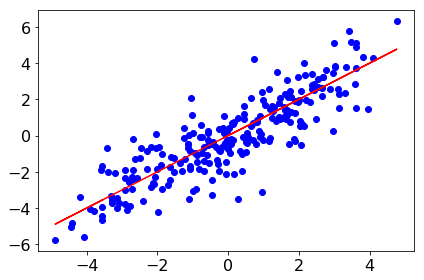

In [0]:
from sklearn.metrics import r2_score, mean_squared_error
# Select a linear model
from sklearn import linear_model
model = sklearn.linear_model.LinearRegression()

# Train the linear model
model.fit(X_train, Y_train)
Y_test_pred = model.predict(X_test)
plt.scatter(Y_actual_test, Y_test_pred, color='b')
plt.plot(Y_actual_test, Y_actual_test, color='r')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig('SparseLinearModelLS.png')
files.download('SparseLinearModelLS.png')
print(np.shape(Y_train))
print("r^2 on test data : %f" % r2_score(Y_test, Y_test_pred))
print("rmse on test data : %f" % np.sqrt(mean_squared_error(Y_test, Y_test_pred)))

# **Lasso Regression**

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


r^2 on test data : 0.946101
rmse on test data : 0.499367


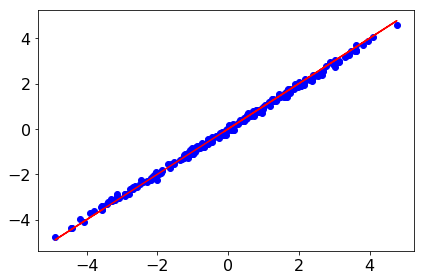

In [0]:
from sklearn.linear_model import Lasso, LassoCV
from sklearn.feature_selection import SelectFromModel

lassocv = LassoCV(cv=20).fit(X_train, Y_train)
Y_test_pred_Lasso = lassocv.predict(X_test)
plt.scatter(Y_actual_test, Y_test_pred_Lasso, color='b')
plt.plot(Y_actual_test, Y_actual_test, color='r')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig('SparseLinearModelLasso.png')
files.download('SparseLinearModelLasso.png')
r2_score_lasso = r2_score(Y_test, Y_test_pred_Lasso)

print("r^2 on test data : %f" % r2_score_lasso)
print("rmse on test data : %f" % np.sqrt(mean_squared_error(Y_test, Y_test_pred_Lasso)))


0.015597830979571955
(800,)
(array([  1,   5,  10,  31,  43,  68, 114, 131, 134, 156, 164, 185, 209,
       226, 243, 258, 263, 265, 276, 302, 336, 356, 368, 395, 396, 426,
       434, 440, 452, 453, 457, 481, 519, 560, 585, 596, 627, 646, 655,
       663, 770, 792]),)


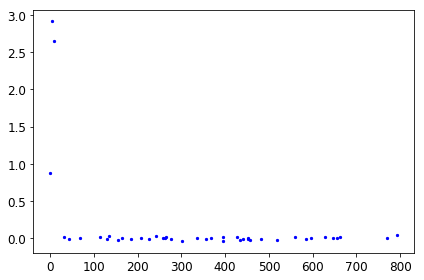

In [0]:
## Print the fitting results
print(lassocv.alpha_)
coef = lassocv.coef_
print(np.shape(coef))
non_zero_coef_index = np.where(np.abs(coef)> 0)
print(non_zero_coef_index)
plt.scatter(non_zero_coef_index, coef[non_zero_coef_index], color='b', s=5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('Lasso.png')
files.download('Lasso.png')


# **Ridge Regression**

r^2 on test data : 0.819723
rmse on test data : 0.913273


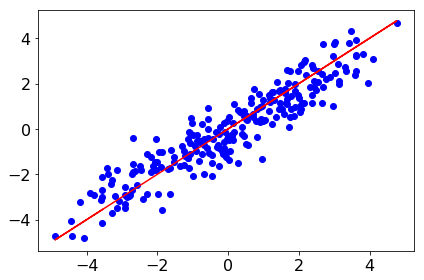

In [0]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV().fit(X_train, Y_train)

Y_test_pred_Ridge = ridgecv.predict(X_test)
plt.scatter(Y_actual_test, Y_test_pred_Ridge, color='b')
plt.plot(Y_actual_test, Y_actual_test, color ='r')
r2_score_lasso = r2_score(Y_test, Y_test_pred_Ridge)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig('SparseLinearModelRidge.png')
files.download('SparseLinearModelRidge.png')
print("r^2 on test data : %f" % r2_score_lasso)
print("rmse on test data : %f" % np.sqrt(mean_squared_error(Y_test, Y_test_pred_Ridge)))

10.0
(1, 800)


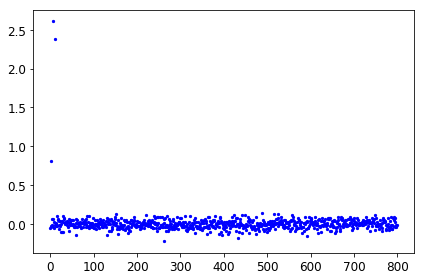

In [0]:
print(ridgecv.alpha_)
coef = ridgecv.coef_
print(np.shape(coef)) 
plt.scatter(np.arange(np.shape(coef)[1]), coef.T, color='b', s=5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('Ridge.png')
files.download('Ridge.png')

# Elastic **Net**

Homework: Left for you to finish.